<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [5]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey_data_clean.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



In [13]:
df['DatabaseWantToWorkWith'].value_counts().head(5)

DatabaseWantToWorkWith
PostgreSQL              3738
PostgreSQL;SQLite       1533
SQLite                  1476
Microsoft SQL Server    1431
MySQL                   1139
Name: count, dtype: int64

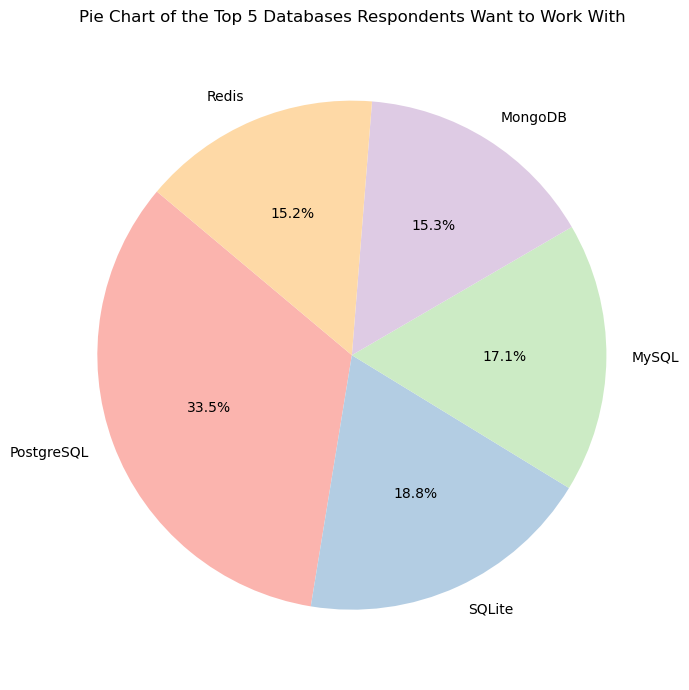

In [19]:
# x = DatabaseWantToWorkWith
# y = Frequency Top 5



df_clean = df.dropna(subset=['DatabaseWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['DB_clean'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('DB_clean').reset_index(drop=True)

# Strip whitespace
df_clean['DB_clean'] = df_clean['DB_clean'].str.strip()



DB_counts = df_clean['DB_clean'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    DB_counts,
    labels=DB_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()





The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [21]:
df['DevType'].value_counts().head(5)

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Name: count, dtype: int64

In [23]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

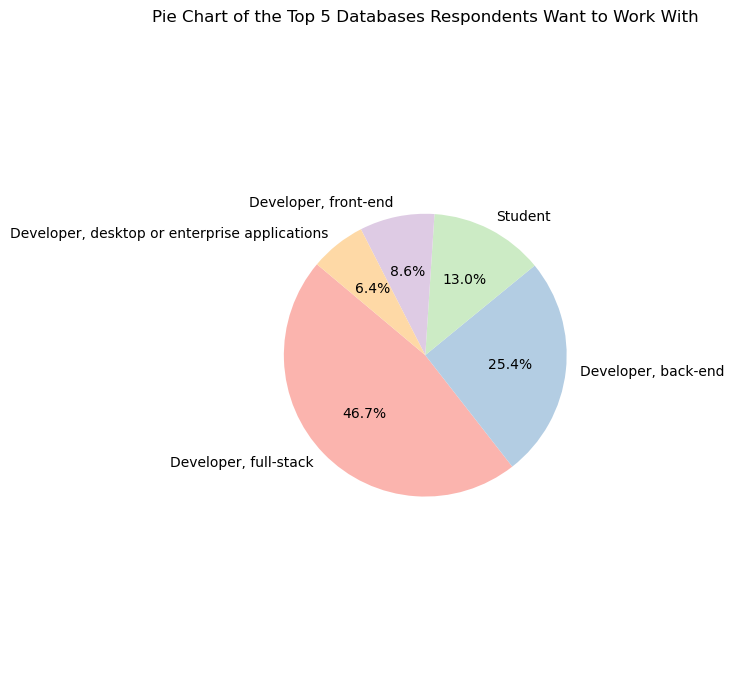

In [27]:


Dev_top5counts = df['DevType'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    Dev_top5counts,
    labels=Dev_top5counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [33]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [37]:
df.rename(columns={'OpSysProfessional use': 'OpSysProfessional'}, inplace=True)
df['OpSysProfessional'].value_counts().head(5)

OpSysProfessional
Windows                                      10472
MacOS                                         8073
Ubuntu                                        3571
Windows;Windows Subsystem for Linux (WSL)     2770
Ubuntu;Windows                                1890
Name: count, dtype: int64

In [39]:
df['OpSysProfessional'].value_counts()

OpSysProfessional
Windows                                                                                                   10472
MacOS                                                                                                      8073
Ubuntu                                                                                                     3571
Windows;Windows Subsystem for Linux (WSL)                                                                  2770
Ubuntu;Windows                                                                                             1890
                                                                                                          ...  
Android;Other Linux-based;Ubuntu;Other (please specify):                                                      1
Android;Cygwin;MacOS;Other Linux-based;Ubuntu;Windows Subsystem for Linux (WSL)                               1
Android;Fedora;Ubuntu;Windows;Windows Subsystem for Linux (WSL);Other (please specify)

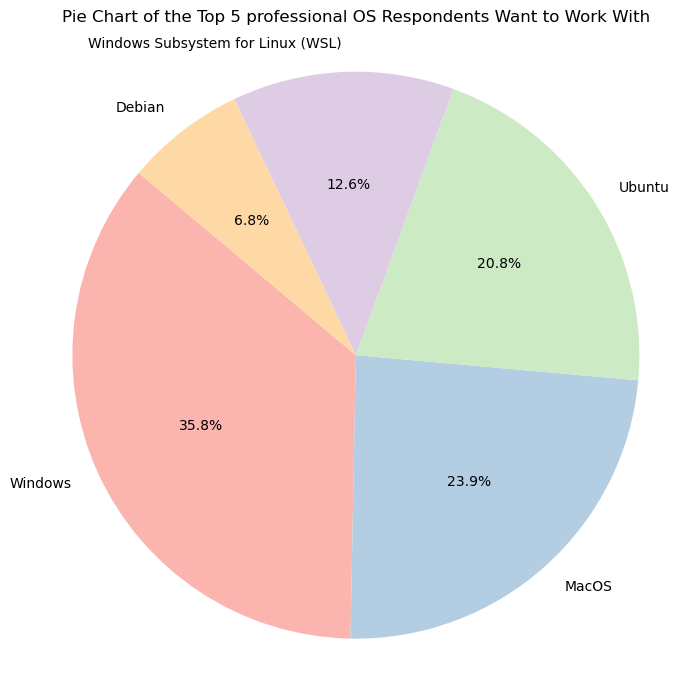

In [41]:
# x = OpSysProfessional
# y = Frequency Top 5



df_clean = df.dropna(subset=['OpSysProfessional']).copy()

# Convert semicolon-separated strings to lists
df_clean['Op_sys'] = df_clean['OpSysProfessional'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Op_sys').reset_index(drop=True)

# Strip whitespace
df_clean['Op_sys'] = df_clean['Op_sys'].str.strip()



OS_counts = df_clean['Op_sys'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    OS_counts,
    labels=OS_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 professional OS Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



In [43]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                          1002
Python                                                                   832
HTML/CSS;JavaScript;PHP;SQL                                              503
HTML/CSS;JavaScript                                                      452
C#                                                                       452
                                                                        ... 
Bash/Shell (all shells);Java;JavaScript;Python;Ruby;Scala;SQL              1
Bash/Shell (all shells);Go;Groovy;Haskell;Java;Python                      1
Bash/Shell (all shells);C#;C++;HTML/CSS;JavaScript;MATLAB;Python;SQL       1
Bash/Shell (all shells);JavaScript;Perl;Python;Ruby;TypeScript             1
C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript                           1
Name: count, Length: 23864, dtype: int64

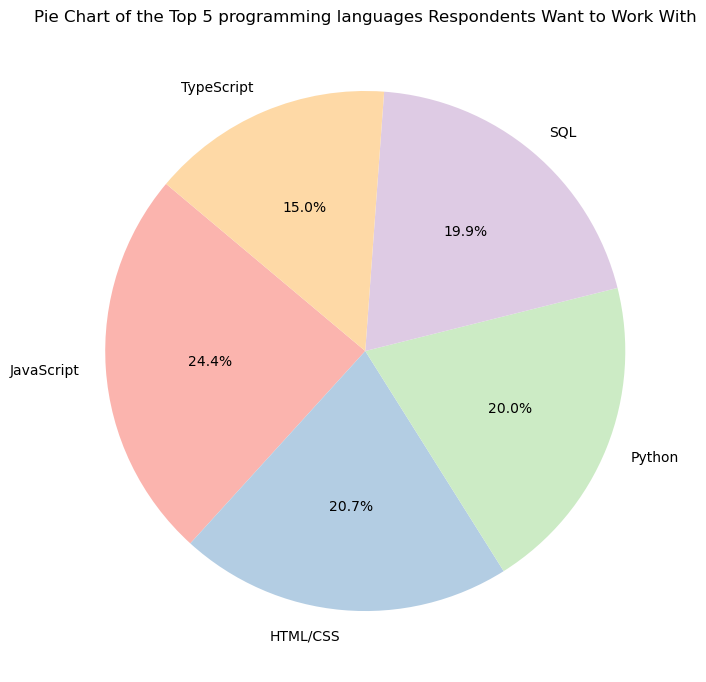

In [51]:
# x = LanguageHaveWorkedWith
# y = Frequency Top 5



df_clean = df.dropna(subset=['LanguageHaveWorkedWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Language'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Language').reset_index(drop=True)

# Strip whitespace
df_clean['Language'] = df_clean['Language'].str.strip()



Lang_counts = df_clean['Language'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    Lang_counts,
    labels=Lang_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 programming languages Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



In [55]:
df['NEWCollabToolsHaveWorkedWith'].value_counts()

NEWCollabToolsHaveWorkedWith
Visual Studio Code                                                                                                                                         6154
Visual Studio;Visual Studio Code                                                                                                                           2546
Notepad++;Visual Studio;Visual Studio Code                                                                                                                 1543
IntelliJ IDEA;Visual Studio Code                                                                                                                           1169
Vim;Visual Studio Code                                                                                                                                     1045
                                                                                                                                                           ... 
CLion;DataG

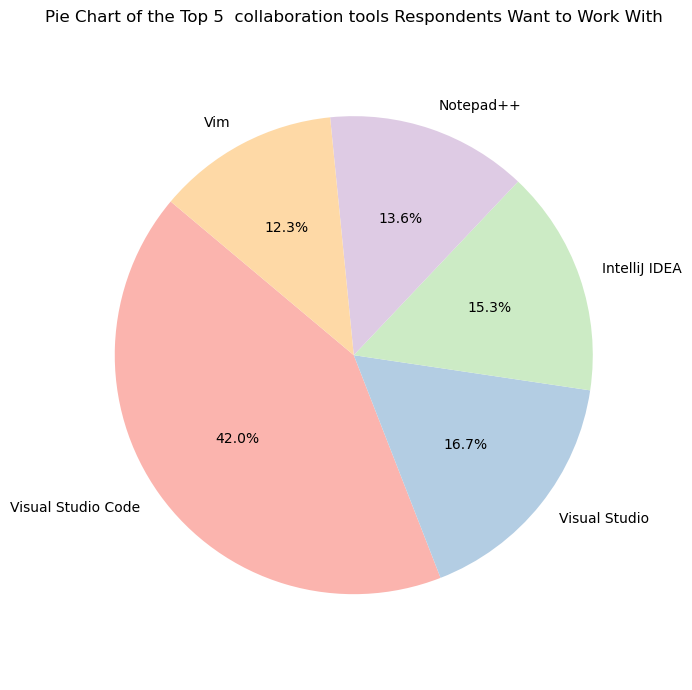

In [57]:
# x = NEWCollabToolsHaveWorkedWith
# y = Frequency Top 5



df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Tools'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Tools').reset_index(drop=True)

# Strip whitespace
df_clean['Tools'] = df_clean['Tools'].str.strip()



Tool_counts = df_clean['Tools'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    Tool_counts,
    labels=Tool_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5  collaboration tools Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



In [59]:
df['LanguageAdmired'].value_counts()

LanguageAdmired
Python                                                                                         1555
HTML/CSS;JavaScript;TypeScript                                                                 1058
C#                                                                                              892
Python;SQL                                                                                      669
Java                                                                                            583
                                                                                               ... 
Bash/Shell (all shells);C;HTML/CSS;Java;Lisp;Perl;Python                                          1
C#;Dart;Go;JavaScript;Python                                                                      1
JavaScript;PHP;Rust;SQL;TypeScript                                                                1
Cobol;SQL;VBA                                                                       

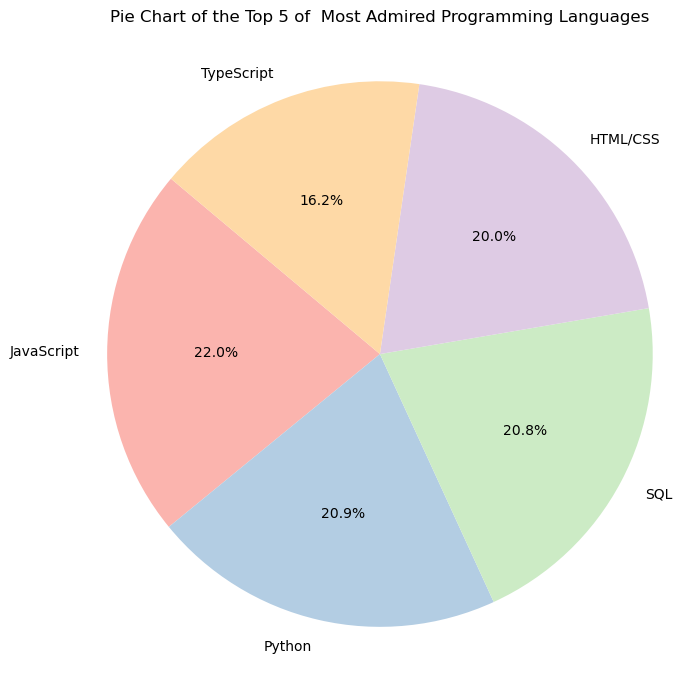

In [61]:
# x = LanguageAdmired
# y = Frequency Top 5



df_clean = df.dropna(subset=['LanguageAdmired']).copy()

# Convert semicolon-separated strings to lists
df_clean['Language'] = df_clean['LanguageAdmired'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Language').reset_index(drop=True)

# Strip whitespace
df_clean['Language'] = df_clean['Language'].str.strip()



Language_counts = df_clean['Language'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    Language_counts,
    labels=Language_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 of  Most Admired Programming Languages')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [65]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional',
 'OfficeStackAsyncHaveWo

In [67]:
df.rename(columns={'AIToolCurrently Using': 'AIToolCurrently'}, inplace=True)
df['AIToolCurrently'].value_counts().head(5)



AIToolCurrently
Writing code;Debugging and getting help;Search for answers                                         2023
Writing code                                                                                       1957
Writing code;Search for answers                                                                    1566
Writing code;Debugging and getting help;Search for answers;Generating content or synthetic data     940
Learning about a codebase;Writing code;Debugging and getting help;Search for answers                846
Name: count, dtype: int64

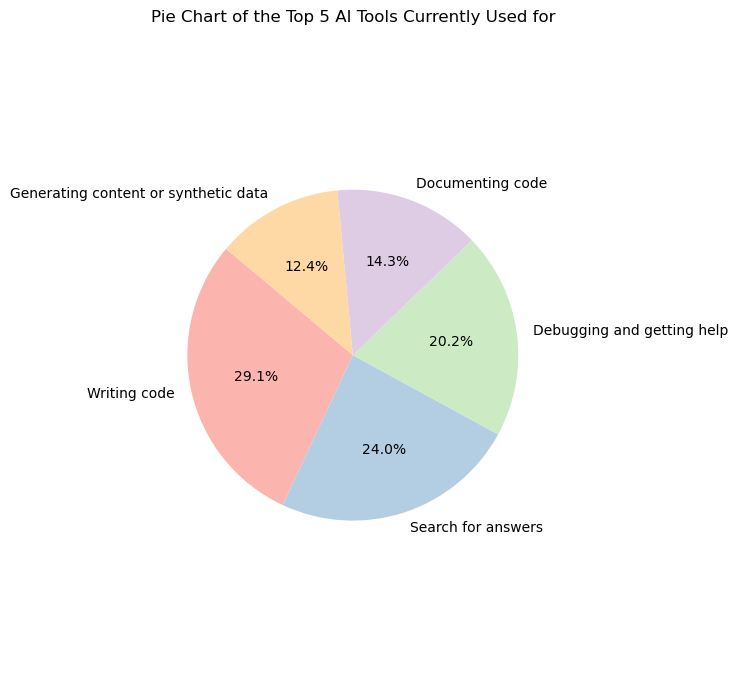

In [71]:
# x = AIToolCurrently
# y = Frequency Top 5



df_clean = df.dropna(subset=['AIToolCurrently']).copy()

# Convert semicolon-separated strings to lists
df_clean['AI_Tool'] = df_clean['AIToolCurrently'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('AI_Tool').reset_index(drop=True)

# Strip whitespace
df_clean['AI_Tool'] = df_clean['AI_Tool'].str.strip()



AITool_counts = df_clean['AI_Tool'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    AITool_counts,
    labels=AITool_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 AI Tools Currently Used for')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [75]:
df['WebframeWantToWorkWith'].value_counts()

WebframeWantToWorkWith
React                                                                                               997
Spring Boot                                                                                         950
Node.js                                                                                             619
ASP.NET CORE                                                                                        607
FastAPI                                                                                             576
                                                                                                   ... 
Angular;AngularJS;ASP.NET;Blazor;Node.js;React;Svelte                                                 1
Express;React;Spring Boot;Strapi                                                                      1
Django;Express;Laravel;React                                                                          1
Deno;Fastify;Svelte                      

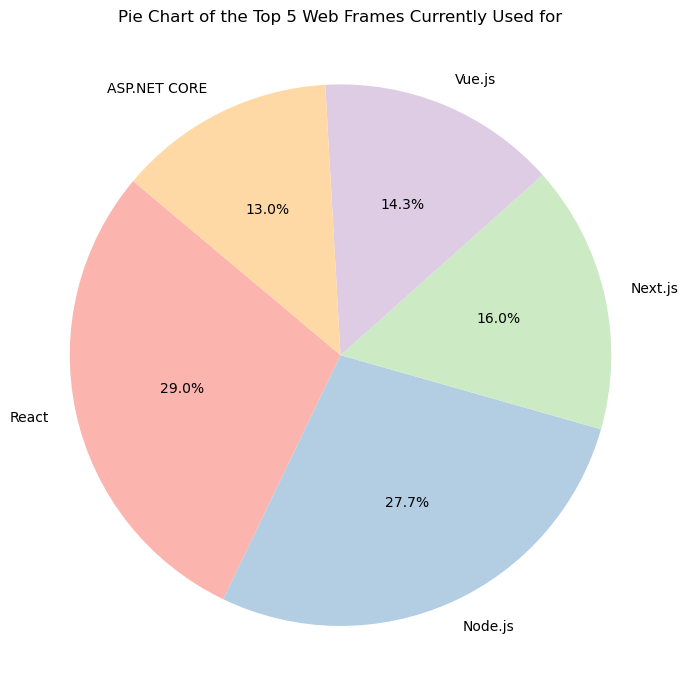

In [77]:
# x = WebframeWantToWorkWith
# y = Frequency Top 5



df_clean = df.dropna(subset=['WebframeWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Web_frame'] = df_clean['WebframeWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Web_frame').reset_index(drop=True)

# Strip whitespace
df_clean['Web_frame'] = df_clean['Web_frame'].str.strip()



WF_counts = df_clean['Web_frame'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    WF_counts,
    labels=WF_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 Web Frames Currently Used for')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [79]:
df['EmbeddedWantToWorkWith'].value_counts()

EmbeddedWantToWorkWith
Rasberry Pi                                                            3036
Arduino;Rasberry Pi                                                    2093
Cargo                                                                  1226
Arduino                                                                 840
GNU GCC                                                                 538
                                                                       ... 
Catch2;CMake;GNU GCC;LLVM's Clang;Ninja;QMake;Rasberry Pi                 1
Arduino;CMake;cppunit;Ninja;Rasberry Pi                                   1
CMake;Cargo;GNU GCC;LLVM's Clang;Meson;Ninja;PlatformIO;Rasberry Pi       1
Arduino;Catch2;Cargo;GNU GCC;LLVM's Clang;Ninja                           1
Catch2;CMake;GNU GCC;PlatformIO                                           1
Name: count, Length: 1471, dtype: int64

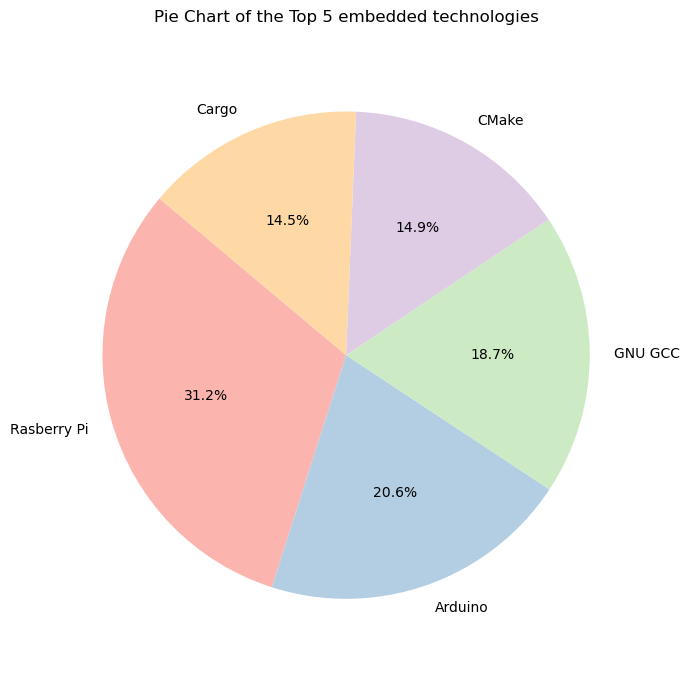

In [83]:
# x = EmbeddedWantToWorkWith
# y = Frequency Top 5



df_clean = df.dropna(subset=['EmbeddedWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['EMB_tech'] = df_clean['EmbeddedWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('EMB_tech').reset_index(drop=True)

# Strip whitespace
df_clean['EMB_tech'] = df_clean['EMB_tech'].str.strip()



EMB_counts = df_clean['EMB_tech'].value_counts().head(5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    EMB_counts,
    labels=EMB_counts.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Pie Chart of the Top 5 embedded technologies')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
